In [1]:
import numpy as np
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt

In [2]:
def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten(order='F')
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)

    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape,order='F')

In [3]:
df_enc = pd.read_csv("train.csv")

In [4]:
1 - 24108,4952,45592 ,2 - 21201,30497, 3 - 45082,16174,31614,34738, 4 - 17675

(-24107, 4952, 45592, -21199, 30497, -45079, 16174, 31614, 34738, -17671)

In [5]:
df_enc.sample(4)

,ImageId_ClassId,EncodedPixels
41124,d0aa4a6df.jpg_1,NaN
35435,b3a70cefc.jpg_4,NaN
38762,c4aeca424.jpg_3,241156 43 241412 127 241668 211 241924 253 242...
23614,76f6fd3df.jpg_3,NaN


In [6]:
from pathlib import Path

In [7]:
trn = Path('train_images')
tst = Path('test_images')

In [8]:
img = imread(trn/df_enc[df_enc.columns[0]][45592][:-2])

In [9]:
from skimage import io

In [10]:
from fractions import Fraction

In [11]:
img.shape

(256, 1600, 3)

In [12]:
Fraction(256,1600)

Fraction(4, 25)

# image with only type 1 defect

In [13]:
df_enc[df_enc.columns[0]][45592]

'e77710d02.jpg_1'

In [14]:
msk = rle_decode(df_enc[df_enc.columns[1]][45592],(256,1600))

In [18]:
np.unique(msk)

array([0, 1], dtype=uint8)

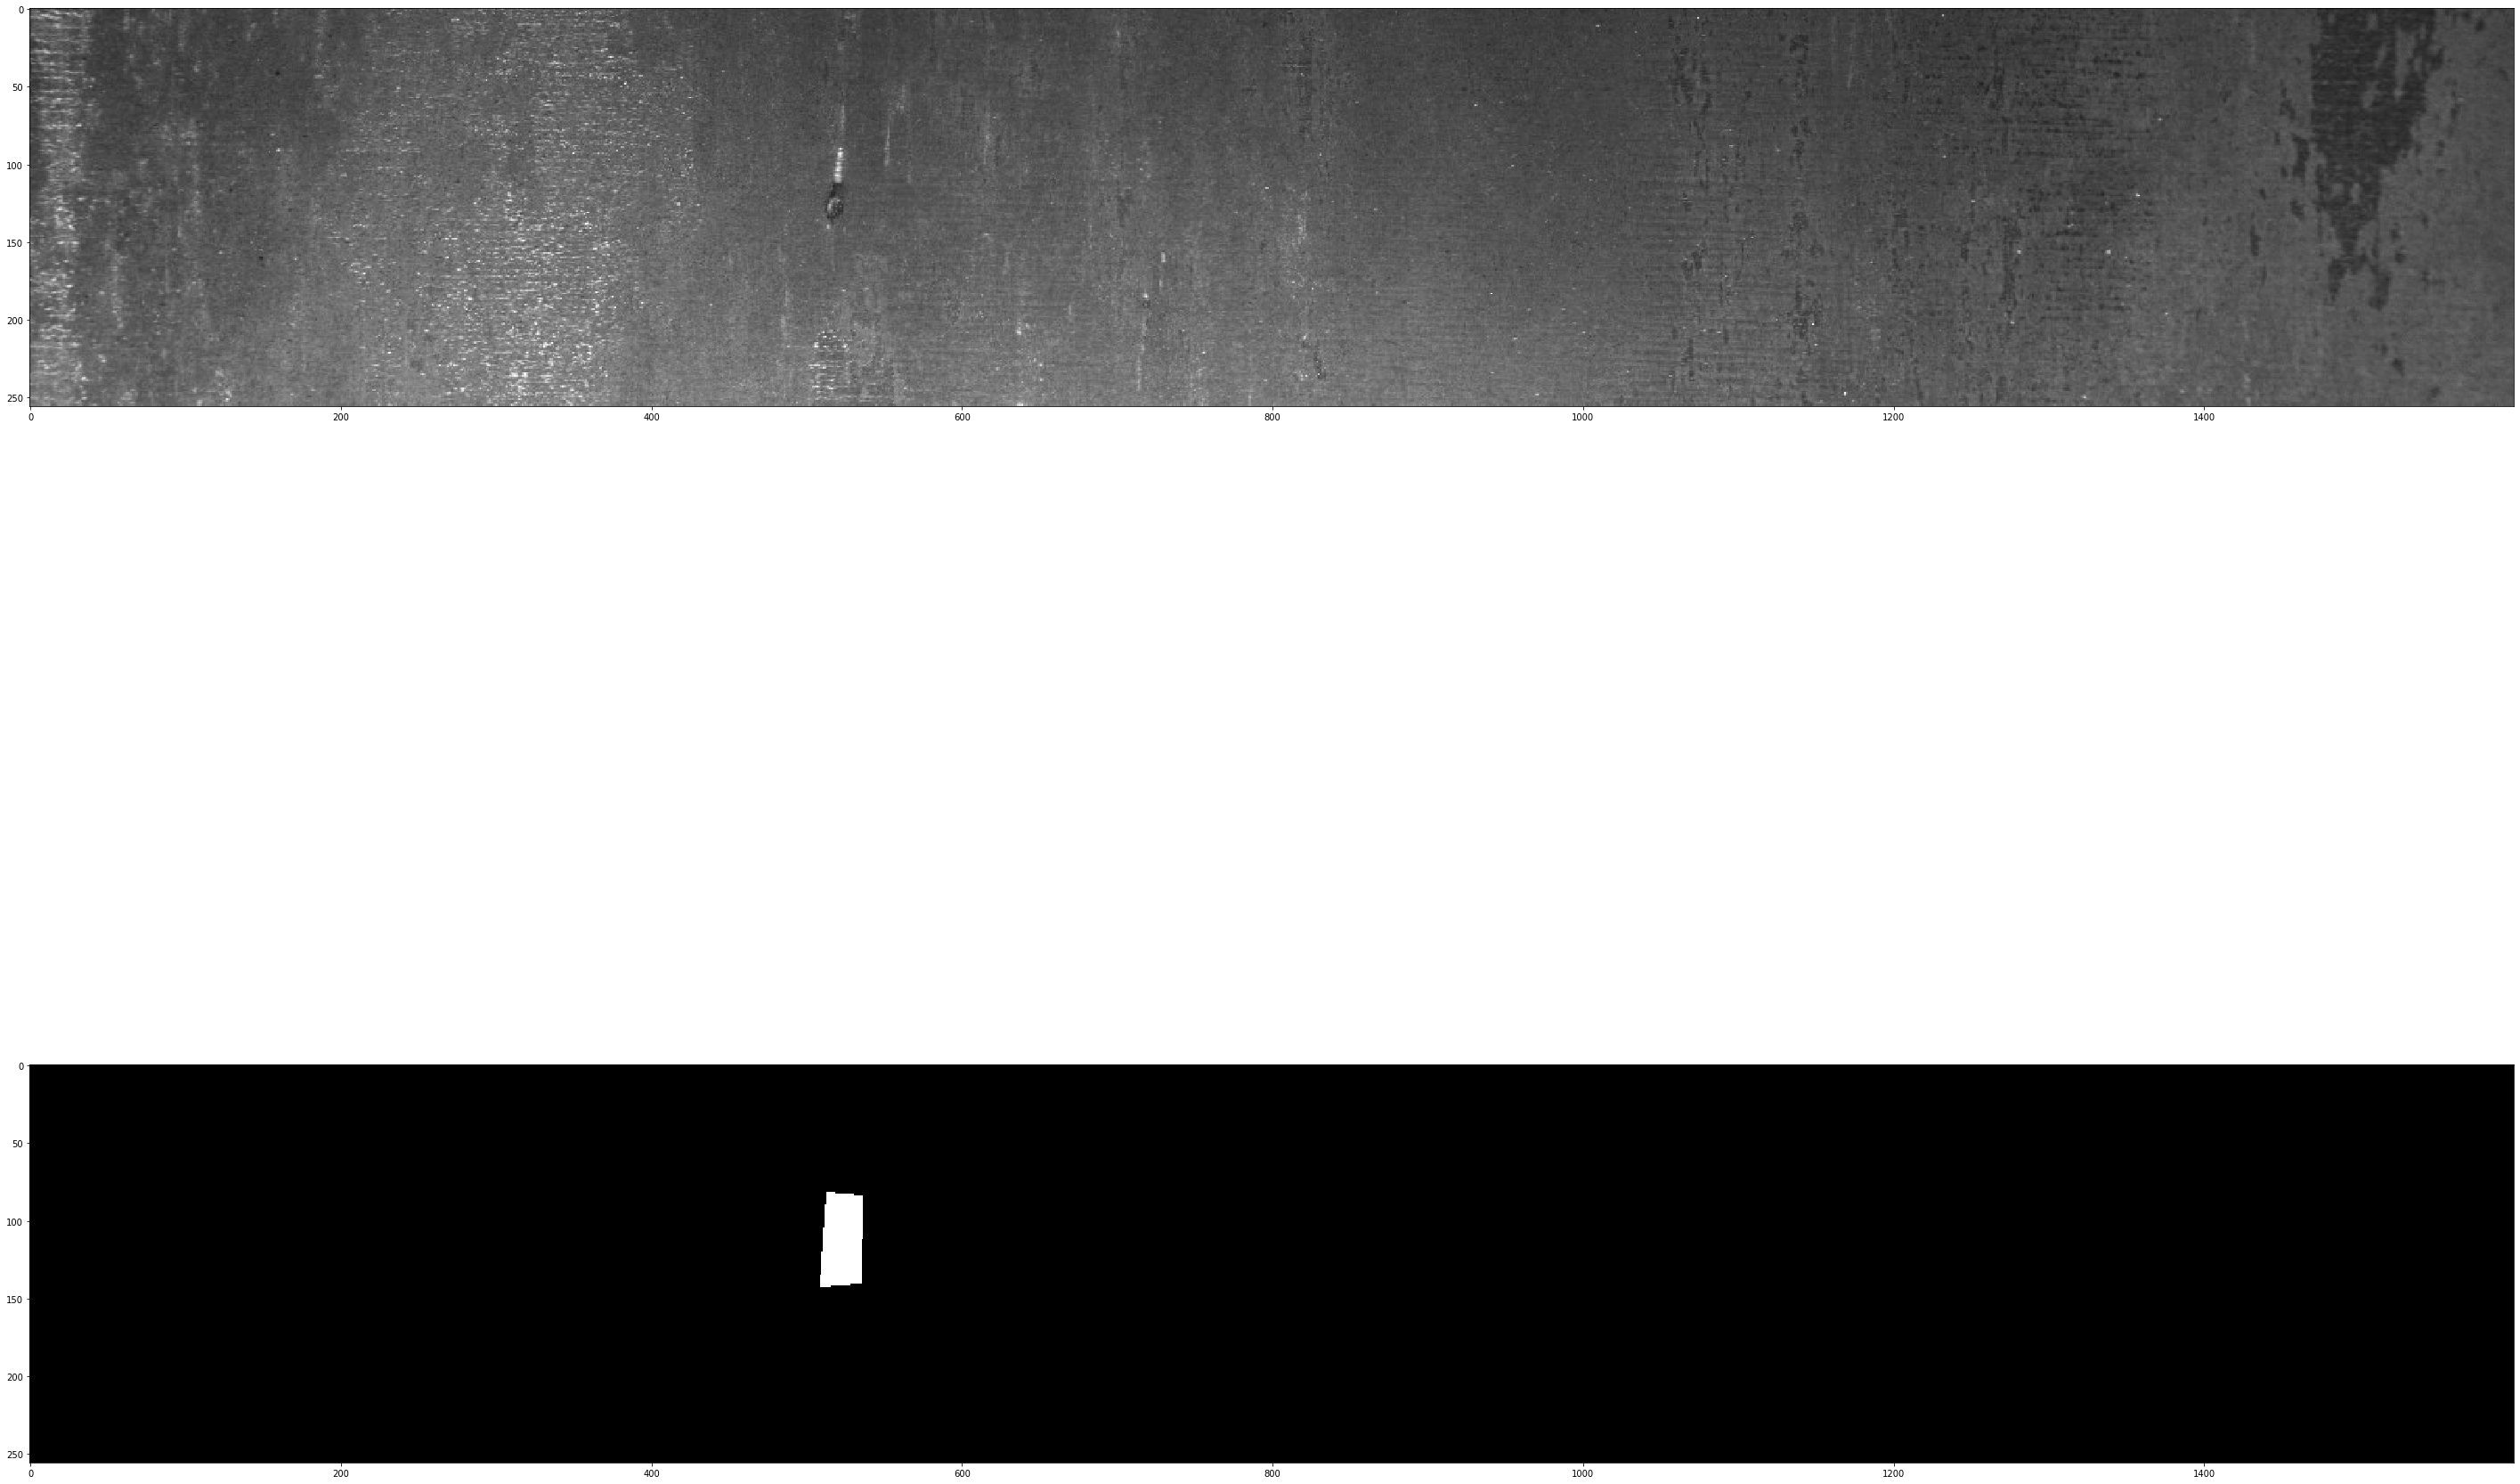

In [16]:
fig,ax = plt.subplots(2,1,figsize=(50,40))
ax[0].imshow(img)
ax[1].imshow(msk,cmap='gray')
#ax[2].imshow(img[:,:,0],cmap='gray')
#ax[3].imshow(img[:,:,1],cmap='gray')
#ax[4].imshow(img[:,:,2],cmap='gray')

In [171]:
from collections import defaultdict

In [188]:
counts = defaultdict(lambda : 0)

def detect_counts(name:str):
    counts[int(name[-1])] += 1

In [186]:
df1 = df_enc.dropna()

In [189]:
df1[df_enc.columns[0]].map(detect_counts)

0        None
18       None
20       None
27       None
30       None
46       None
47       None
51       None
56       None
57       None
63       None
70       None
78       None
90       None
94       None
119      None
122      None
134      None
136      None
137      None
142      None
148      None
149      None
154      None
160      None
166      None
176      None
177      None
182      None
186      None
         ... 
50086    None
50094    None
50099    None
50108    None
50118    None
50126    None
50130    None
50142    None
50146    None
50150    None
50154    None
50158    None
50162    None
50166    None
50167    None
50170    None
50172    None
50173    None
50198    None
50206    None
50210    None
50215    None
50230    None
50234    None
50238    None
50242    None
50258    None
50262    None
50266    None
50270    None
Name: ImageId_ClassId, Length: 7095, dtype: object

In [190]:
counts

defaultdict(<function __main__.<lambda>()>, {1: 897, 3: 5150, 4: 801, 2: 247})

In [191]:
len(df_enc)/4

12568.0

# generate masks

In [19]:
fls

NameError: name 'fls' is not defined